# **Abstract**

The Mobile Price Classification dataset is a valuable resource for identifying the mobile price range. It encompasses a variety of features, such as ram, battery power, among others, to determine the price range of the mobile based on these features.

This dataset helps identify the underlying factors that affect the pricing of mobile phones. By analyzing the relationships between these features and their respective price ranges, one can gain valuable insights into the mobile device market’s dynamics.

# Summary

# **References:**

GeeksForGeeks: https://www.geeksforgeeks.org/automl-using-h2o/

kaggle tutorial on automl h2o: https://www.kaggle.com/code/paradiselost/tutorial-automl-capabilities-of-h2o-library

Medium article for H2o: https://seanzhang-data.medium.com/h2o-automl-in-python-comprehensive-tutorial-f25001c11b80

# **Importing required Libraries and H20 Initialization**
Automated machine learning (AutoML) is the process of automating the end-to-end process of applying machine learning to real-world problems.

H2O AutoML automates the steps like basic data processing, model training and tuning, Ensemble and stacking of various models to provide the models with the best performance so that developers can focus on other steps like data collection, feature engineering and deployment of model.
Installing h2o

In [3]:
!pip install h2o

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 265.2/265.2 MB 4.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for h2o: filename=h2o-3.44.0.3-py2.py3-none-any.whl size=265293968 sha256=18ffe42564bd8c79456434eb6c6798c0993a1529c0b88000864d8ed8b6285699
  Stored in directory: /root/.cache/pip/wheels/77/9a/1c/2da26f943fd46b57f3c20b54847b936b9152b831dc7447cf71
Successfully built h2o


In [4]:
import h2o
from h2o.automl import H2OAutoML

h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.21" 2023-10-17; OpenJDK Runtime Environment (build 11.0.21+9-post-Ubuntu-0ubuntu122.04); OpenJDK 64-Bit Server VM (build 11.0.21+9-post-Ubuntu-0ubuntu122.04, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.10/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpabqiqkkj
  JVM stdout: /tmp/tmpabqiqkkj/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpabqiqkkj/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,04 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.44.0.3
H2O_cluster_version_age:,1 month and 30 days
H2O_cluster_name:,H2O_from_python_unknownUser_7r4m4q
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.170 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


In [50]:
datafile_path = 'https://raw.githubusercontent.com/jayanti-neu/dsem-assignment2/main/train.csv'
df = h2o.import_file(datafile_path)
data = pd.read_csv('https://raw.githubusercontent.com/jayanti-neu/dsem-assignment2/main/train.csv')

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [6]:
df.head()

battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2
563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1
1859,0,0.5,1,3,0,22,0.7,164,1,7,1004,1654,1067,17,1,10,1,0,0,1
1821,0,1.7,0,4,1,10,0.8,139,8,10,381,1018,3220,13,8,18,1,0,1,3
1954,0,0.5,1,0,0,24,0.8,187,4,0,512,1149,700,16,3,5,1,1,1,0
1445,1,0.5,0,0,0,53,0.7,174,7,14,386,836,1099,17,1,20,1,0,0,0
509,1,0.6,1,2,1,9,0.1,93,5,15,1137,1224,513,19,10,12,1,0,0,0


In [7]:
df['price_range'].table()

price_range,Count
0,500
1,500
2,500
3,500


In [8]:
df.describe()

Rows:2000
Cols:21

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
type,int,int,real,int,int,int,int,real,int,int,int,int,int,int,int,int,int,int,int,int,int
mins,501.0,0.0,0.5,0.0,0.0,0.0,2.0,0.1,80.0,1.0,0.0,0.0,500.0,256.0,5.0,0.0,2.0,0.0,0.0,0.0,0.0
mean,1238.5184999999992,0.495,1.52225,0.5095,4.309500000000001,0.5215,32.046499999999995,0.5017500000000001,140.24900000000005,4.5205,9.9165,645.108,1251.5154999999997,2124.213,12.306499999999998,5.767000000000001,11.010999999999996,0.7615,0.503,0.507,1.5
maxs,1998.0,1.0,3.0,1.0,19.0,1.0,64.0,1.0,200.0,8.0,20.0,1960.0,1998.0,3998.0,19.0,18.0,20.0,1.0,1.0,1.0,3.0
sigma,439.41820608353135,0.5001000400170075,0.8160042088950687,0.500034766175005,4.341443747983894,0.49966246736236386,18.145714955206856,0.2884155496235116,35.399654896388355,2.2878367180426604,6.0643149413477815,443.7808108064385,432.19944694633796,1084.7320436099494,4.213245004356306,4.356397605826404,5.463955197766688,0.42627292231873126,0.500116044562674,0.5000760322381083,1.118313602106461
zeros,0,1010,0,981,474,957,0,0,0,0,101,2,0,0,0,180,0,477,994,986,500
missing,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0,842.0,0.0,2.2,0.0,1.0,0.0,7.0,0.6,188.0,2.0,2.0,20.0,756.0,2549.0,9.0,7.0,19.0,0.0,0.0,1.0,1.0
1,1021.0,1.0,0.5,1.0,0.0,1.0,53.0,0.7,136.0,3.0,6.0,905.0,1988.0,2631.0,17.0,3.0,7.0,1.0,1.0,0.0,2.0
2,563.0,1.0,0.5,1.0,2.0,1.0,41.0,0.9,145.0,5.0,6.0,1263.0,1716.0,2603.0,11.0,2.0,9.0,1.0,1.0,0.0,2.0


In [9]:
df.shape

(2000, 21)

In [10]:
pct_rows=0.80
df_train, df_test = df.split_frame([pct_rows])

In [11]:
print(df_train.shape)
print(df_test.shape)

(1620, 21)
(380, 21)


In [12]:
df_train['price_range'].table()

price_range,Count
0,398
1,411
2,399
3,412


In [13]:
#Display all columns in X
X=df.columns
print(X)

['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g', 'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g', 'touch_screen', 'wifi', 'price_range']


In [14]:
#Seperate Dependent variable from Independent variable
y ='price_range'
X.remove(y)
print(X)

['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g', 'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g', 'touch_screen', 'wifi']


# H2O AutoML trains and cross-validates:

a default Random Forest (DRF),

an Extremely-Randomized Forest (XRT),

a random grid of Generalized Linear Models (GLM),

a random grid of XGBoost (XGBoost),

a random grid of Gradient Boosting Machines (GBM),

a random grid of Deep Neural Nets (DeepLearning),

and 2 Stacked Ensembles, one of all the models, and one of only the best models of each kind.

Training of the model with the following parameters:



In [15]:
# Set up AutoML
aml = H2OAutoML(
    max_runtime_secs=(300),  # 5 minutes
    max_models=None,  # no limit
    seed=17 #for reproducibility
)

In [16]:
#pass the data through H20AutoML
aml.train(x=X,y=y,training_frame=df_train)

AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%


key,value
Stacking strategy,cross_validation
Number of base models (used / total),14/63
# GBM base models (used / total),5/24
# XGBoost base models (used / total),5/30
# DeepLearning base models (used / total),3/6
# DRF base models (used / total),0/2
# GLM base models (used / total),1/1
Metalearner algorithm,GLM
Metalearner fold assignment scheme,Random
Metalearner nfolds,5


 Lower values for MSE, RMSE, MAE, and RMSLE indicate better model performance, while a higher R^2 value suggests a better fit to the data.

In [17]:
print(aml.leaderboard)

model_id                                                    rmse        mse       mae     rmsle    mean_residual_deviance
StackedEnsemble_AllModels_4_AutoML_1_20240220_05309     0.266166  0.0708442  0.196464  0.132259                 0.0708442
StackedEnsemble_AllModels_3_AutoML_1_20240220_05309     0.267059  0.0713205  0.196325  0.132552                 0.0713205
StackedEnsemble_BestOfFamily_3_AutoML_1_20240220_05309  0.269892  0.0728419  0.205738  0.136764                 0.0728419
StackedEnsemble_AllModels_2_AutoML_1_20240220_05309     0.270222  0.0730198  0.204846  0.135651                 0.0730198
StackedEnsemble_BestOfFamily_4_AutoML_1_20240220_05309  0.272259  0.0741249  0.204732  0.13619                  0.0741249
StackedEnsemble_AllModels_1_AutoML_1_20240220_05309     0.273302  0.0746939  0.205985  0.137588                 0.0746939
StackedEnsemble_BestOfFamily_2_AutoML_1_20240220_05309  0.27445   0.0753229  0.208343  0.139409                 0.0753229
GBM_grid_1_AutoML_1_2024

The models listed in the leaderboard are ranked based on their rmse score, where a lower score indicates better performance. The top row in the leaderboard represents the best-performing model with the lowest rmse score. The evaluation metrics can be used to compare the performance of different models and help in selecting the best model for the particular use case.

In this leaderboard, the best performing model is

StackedEnsemble_AllModels_4_AutoML_5_20240219_214215 with an rmse score of  0.25337

The second-best model is StackedEnsemble_AllModels_3_AutoML_5_20240219_214215 with an rmse score of 0.253948

The models are then listed in descending order based on their rmse scores.

In [20]:
model_index = 0
glm_index = 0
glm_model = ""
aml_leaderboard_df = aml.leaderboard.as_data_frame()
models_dict = {}
for m in aml_leaderboard_df["model_id"]:
    models_dict[m] = model_index
    if "StackedEnsemble" not in m:
        break
    model_index = model_index + 1

for m in aml_leaderboard_df["model_id"]:
    if "GLM" in m:
        models_dict[m] = glm_index
        break
    glm_index = glm_index + 1
models_dict

Export File progress: |██████████████████████████████████████████████████████████| (done) 100%


{'StackedEnsemble_AllModels_4_AutoML_1_20240220_05309': 0,
 'StackedEnsemble_AllModels_3_AutoML_1_20240220_05309': 1,
 'StackedEnsemble_BestOfFamily_3_AutoML_1_20240220_05309': 2,
 'StackedEnsemble_AllModels_2_AutoML_1_20240220_05309': 3,
 'StackedEnsemble_BestOfFamily_4_AutoML_1_20240220_05309': 4,
 'StackedEnsemble_AllModels_1_AutoML_1_20240220_05309': 5,
 'StackedEnsemble_BestOfFamily_2_AutoML_1_20240220_05309': 6,
 'GBM_grid_1_AutoML_1_20240220_05309_model_11': 7,
 'GLM_1_AutoML_1_20240220_05309': 57}

In [22]:
print(model_index)
best_model = h2o.get_model(aml.leaderboard[model_index, "model_id"])

7


In [23]:
best_model.algo

'gbm'

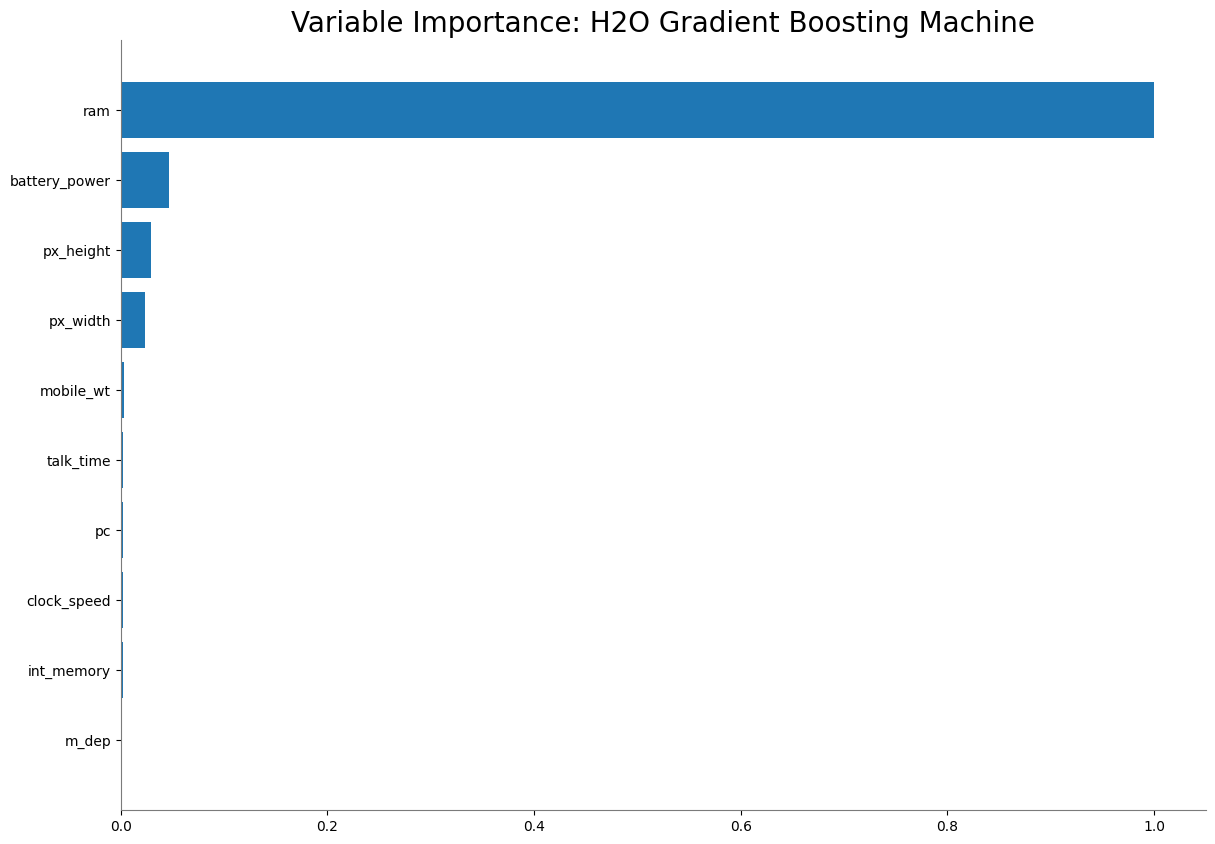

<Figure size 640x480 with 0 Axes>

In [25]:
import matplotlib.pyplot as plt

%matplotlib inline

import warnings
import matplotlib.cbook

if best_model.algo in [
    "gbm",
    "drf",
    "xrt",
    "xgboost",
]:  # Importance of all the variables in GBM algorithm.
    best_model.varimp_plot()

The above plot shows the importance of each feature in the model's predictions. We can see that **ram** is the most important feature  

This plot shows the standardized coefficients of the features used in the model, which helps in understanding the impact of each feature on the model's predictions. As we can see ram has the most positive impact on our dependent variable.

A higher magnitude value indicates that the variable has a stronger impact on the outcome variable, while a lower value indicates a weaker impact.

In [28]:
print(best_model.rmse(train=True))

0.13512686603531865


A lower RMSE indicates better performance, with 0 being a perfect fit.

In [29]:
mod_perf = best_model.model_performance(df_test)

In [30]:
mod_perf

ModelMetricsRegression: gbm
** Reported on test data. **

MSE: 0.06571118099528679
RMSE: 0.25634192204024453
MAE: 0.1737546599869682
RMSLE: 0.12174476643268864
Mean Residual Deviance: 0.06571118099528679

In [31]:
predictions = best_model.predict(df_test)

gbm prediction progress: |███████████████████████████████████████████████████████| (done) 100%


# Q1:

In [34]:
variable_importance = best_model.varimp()
variable_importance

[('ram', 8700.5, 1.0, 0.8938581739324195),
 ('battery_power',
  409.74493408203125,
  0.04709441228458494,
  0.04209572536711959),
 ('px_height', 253.3050537109375, 0.029113850205268375, 0.026023652980623185),
 ('px_width', 205.5025177001953, 0.023619621596482423, 0.021112591829206516),
 ('mobile_wt',
  27.149688720703125,
  0.0031204745383257427,
  0.002789261672630458),
 ('talk_time',
  18.922834396362305,
  0.002174913441338119,
  0.0019440641571355653),
 ('pc', 17.515090942382812, 0.002013113147794128, 0.0017994376422066044),
 ('clock_speed',
  15.531486511230469,
  0.00178512574119079,
  0.0015956492352605565),
 ('int_memory',
  15.35612678527832,
  0.0017649706091923821,
  0.0015776334057770926),
 ('m_dep', 11.904729843139648, 0.0013682811152393136, 0.0012230492590940272),
 ('n_cores', 11.428717613220215, 0.0013135702101281783, 0.001174145469357198),
 ('fc', 11.417189598083496, 0.001312245227065513, 0.0011729611224163127),
 ('sc_w', 10.723155975341797, 0.001232475831888029, 0.001

interpreting the results based on the above information:

RAM: The most important predictor with a relative importance of 1.0. It has the highest impact on the model's predictions.

Battery Power, Pixel Height, Pixel Width: These predictors also have significant importance but are comparatively less important than RAM.

Other Predictors: The importance of other predictors decreases further down the list. Predictors like 'dual_sim', 'blue', 'touch_screen', etc., have relatively low importance compared to the top predictors.

# Q2: Are any model assumptions violated?

We have to check for assumptions like independence of errors and homoscedasticity to see if any model assumptions are violated in our gbm model

# Q3: Is there any multicollinearity in the model?

Multicollinearity occurs when independent variables in a regression model are highly correlated with each other. One common way to detect multicollinearity is by calculating the Variance Inflation Factor (VIF) for each predictor variable.

In [51]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor

X = data.drop(columns=['price_range'])
y = data['price_range']

# Calculate VIF for each predictor
vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Display the results
print(vif_data)

         Variable        VIF
0   battery_power   8.076717
1            blue   1.981927
2     clock_speed   4.260479
3        dual_sim   2.015006
4              fc   3.413529
5          four_g   3.194321
6      int_memory   3.961239
7           m_dep   3.911115
8       mobile_wt  12.972548
9         n_cores   4.646070
10             pc   6.228797
11      px_height   4.262680
12       px_width  11.766282
13            ram   4.688608
14           sc_h  11.510780
15           sc_w   3.720867
16      talk_time   4.859144
17        three_g   6.191783
18   touch_screen   1.989078
19           wifi   2.021012


The VIF measures how much the variance of the estimated regression coefficients are increased because of multicollinearity.

VIF = 1: No multicollinearity.
1 < VIF < 5: Moderate multicollinearity.
VIF >= 5: High multicollinearity.

These columns can be removed 'battery_power', 'mobile_wt', 'px_width', 'sc_h', 'three_g', 'pc' as they have high multicolinearity


# Q4

we can examine the correlation matrix of the predictors.

<Axes: >

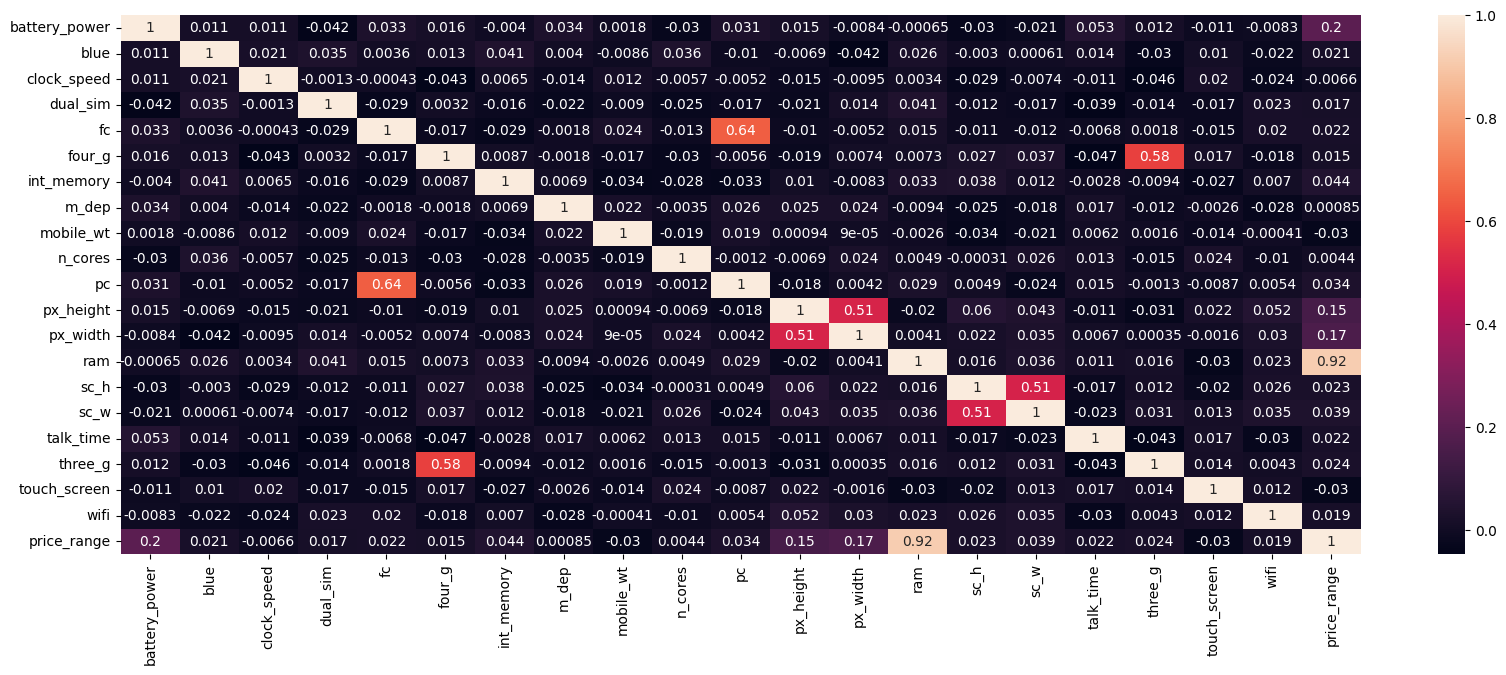

In [63]:
import seaborn as sns
plt.figure(figsize=(20,7))
sns.heatmap(data.corr(), annot=True)

values that are highly collerated have values close to 1

# Q5: In in multivariate models rank the most significant predictor variables and exclude insignificant ones from the model.

We can see using the VIF values that mobile_wt, px_width, sch_h are insignificant.
while the values with high variable importance are significant

# Q6: Does the model make sense?

Yes the model makes sense since the rmse for test set was very small


# Q7: Does regularization help?

setting up  alpha for L1/L2 regularization

In [71]:
import h2o
from h2o.automl import H2OAutoML
from h2o.estimators import H2OGeneralizedLinearEstimator

# Initialize H2O cluster
h2o.init()

# Load your dataset into H2O
data = h2o.import_file("https://raw.githubusercontent.com/jayanti-neu/dsem-assignment2/main/train.csv")


x = data.columns[:-1]
y = "price_range"

max_training_time_secs = 10

# Train model without regularization
aml_no_reg = H2OAutoML(max_runtime_secs=max_training_time_secs, max_models=1, seed=42, exclude_algos=["GLM"])
aml_no_reg.train(x=x, y=y, training_frame=data)

# Train model with L1 regularization
glm_l1 = H2OGeneralizedLinearEstimator(family="gaussian", alpha=1)
glm_l1.train(x=x, y=y, training_frame=data)

# Train model with L2 regularization
glm_l2 = H2OGeneralizedLinearEstimator(family="gaussian", alpha=0)
glm_l2.train(x=x, y=y, training_frame=data)

perf_no_reg = aml_no_reg.leader.model_performance()
perf_with_reg_l1 = glm_l1.model_performance()
perf_with_reg_l2 = glm_l2.model_performance()

mse_no_reg = perf_no_reg.mse()
mse_with_reg_l1 = perf_with_reg_l1.mse()
mse_with_reg_l2 = perf_with_reg_l2.mse()

print("MSE without regularization:", mse_no_reg)
print("MSE with L1 regularization:", mse_with_reg_l1)
print("MSE with L2 regularization:", mse_with_reg_l2)



Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O_cluster_uptime:,3 hours 0 mins
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.44.0.3
H2O_cluster_version_age:,1 month and 30 days
H2O_cluster_name:,H2O_from_python_unknownUser_7r4m4q
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.131 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%
glm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%
glm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%
MSE without regularization: 0.004664971936453291
MSE with L1 regularization: 0.10173012027341932
MSE with L2 regularization: 0.10171250024625753
H2O session _sid_a2d7 closed.


<ipython-input-71-d10e1c40c2de>:45: H2ODeprecationWarning: Deprecated, use ``h2o.cluster().shutdown()``.
  h2o.shutdown()


The model without regularization performs the best in terms of prediction accuracy, as it has the lowest MSE.
The models with L1 and L2 regularization have higher MSE values, indicating slightly poorer performance compared to the model without regularization. However, regularization techniques like L1 and L2 are often used to improve model generalization and prevent overfitting, rather than solely focusing on minimizing MSE.

# Q8: Which independent variables are significant?

as we saw from the variable importance plot the top 4 variables have significant importance: ram, batter_power, px_width, px_width

# Q9: Which hyperparameters are important?

In [75]:
best_model = aml.leader

# Get the hyperparameters of the best model
hyperparameters = best_model.actual_params

# Display important hyperparameters
print("Important hyperparameters:")
for param, value in hyperparameters.items():
    print(f"{param}: {value}")

Important hyperparameters:
model_id: StackedEnsemble_BestOfFamily_1_AutoML_2_20240220_35932
training_frame: AutoML_2_20240220_35932_training_train.hex
response_column: price_range
validation_frame: None
blending_frame: None
base_models: [{'__meta': {'schema_version': 3, 'schema_name': 'KeyV3', 'schema_type': 'Key<Keyed>'}, 'name': 'GLM_1_AutoML_2_20240220_35932', 'type': 'Key<Keyed>', 'URL': None}, {'__meta': {'schema_version': 3, 'schema_name': 'KeyV3', 'schema_type': 'Key<Keyed>'}, 'name': 'XGBoost_1_AutoML_2_20240220_35932', 'type': 'Key<Keyed>', 'URL': None}, {'__meta': {'schema_version': 3, 'schema_name': 'KeyV3', 'schema_type': 'Key<Keyed>'}, 'name': 'GBM_1_AutoML_2_20240220_35932', 'type': 'Key<Keyed>', 'URL': None}]
metalearner_algorithm: glm
metalearner_nfolds: 5
metalearner_fold_assignment: None
metalearner_fold_column: None
metalearner_params: 
metalearner_transform: NONE
max_runtime_secs: 1.601
weights_column: None
offset_column: None
custom_metric_func: None
seed: 45
score

# Q9: Which hyperparameters are important?

In [88]:
from h2o.estimators import H2OGradientBoostingEstimator
from h2o.grid.grid_search import H2OGridSearch

# Initialize H2O cluster
h2o.init()

# Load your dataset into H2O
data = h2o.import_file("https://raw.githubusercontent.com/jayanti-neu/dsem-assignment2/main/train.csv")

# Identify predictors and response
x = data.columns[:-1]
y = "price_range"

# Define hyperparameters grid
hyperparams = {
    'ntrees': [50, 100, 150],
    'max_depth': [5, 10, 15],
    'learn_rate': [0.1, 0.01, 0.001]
}

# Define search criteria
search_criteria = {'strategy': "RandomDiscrete", 'max_models': 10}

# Train H2O Gradient Boosting Estimator with Grid Search
gbm = H2OGradientBoostingEstimator(seed=42)
grid = H2OGridSearch(gbm, hyper_params=hyperparams, search_criteria=search_criteria)
grid.train(x=x, y=y, training_frame=data)

# Get the best model from Grid Search
best_model = grid.get_grid()[0]

# Get variable importance
variable_importance = best_model.varimp(use_pandas=True)

# Display significant independent variables
significant_variables = variable_importance[variable_importance['percentage'] > 0]  # Adjust threshold as needed
print("Significant independent variables:")
print(significant_variables)


Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O_cluster_uptime:,50 mins 31 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.44.0.3
H2O_cluster_version_age:,1 month and 30 days
H2O_cluster_name:,H2O_from_python_unknownUser_fwkq7z
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.097 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
gbm Grid Build progress: |███████████████████████████████████████████████████████| (done) 100%
Significant independent variables:
         variable  relative_importance  scaled_importance  percentage
0             ram         11388.319336           1.000000    0.866095
1   battery_power           732.408142           0.064312    0.055701
2        px_width           406.182495           0.035667    0.030891
3       px_height           401.038361           0.035215    0.030499
4       mobile_wt            41.646015           0.003657    0.003167
5            sc_w            19.895203           0.001747    0.001513
6       talk_time            19.818996           0.001740    0.001507
7              pc            19.713509           0.001731    0.001499
8      int_memory            17.766993           0.001560    0.001351
9           m_dep            17.545326           0.001541    0.001334
10   

In [89]:

leader_model = aml.leader

# Get the hyperparameters of the leader model
hyperparameters = leader_model.actual_params

# Print the hyperparameters
print("Hyperparameters of the leader model:")
for param_name, param_value in hyperparameters.items():
    print(param_name, ":", param_value)

Hyperparameters of the leader model:
model_id : StackedEnsemble_BestOfFamily_2_AutoML_4_20240220_43403
training_frame : AutoML_4_20240220_43403_training_py_59_sid_947e
response_column : price_range
validation_frame : py_60_sid_947e
blending_frame : None
base_models : [{'__meta': {'schema_version': 3, 'schema_name': 'KeyV3', 'schema_type': 'Key<Keyed>'}, 'name': 'GBM_3_AutoML_4_20240220_43403', 'type': 'Key<Keyed>', 'URL': None}, {'__meta': {'schema_version': 3, 'schema_name': 'KeyV3', 'schema_type': 'Key<Keyed>'}, 'name': 'XGBoost_2_AutoML_4_20240220_43403', 'type': 'Key<Keyed>', 'URL': None}, {'__meta': {'schema_version': 3, 'schema_name': 'KeyV3', 'schema_type': 'Key<Keyed>'}, 'name': 'GLM_1_AutoML_4_20240220_43403', 'type': 'Key<Keyed>', 'URL': None}, {'__meta': {'schema_version': 3, 'schema_name': 'KeyV3', 'schema_type': 'Key<Keyed>'}, 'name': 'DRF_1_AutoML_4_20240220_43403', 'type': 'Key<Keyed>', 'URL': None}]
metalearner_algorithm : glm
metalearner_nfolds : 5
metalearner_fold_ass

Conclusion:
we can observe that automl h2o library helps with training our data very fast and helps in analysing and tune to our data.

License:


MIT License

Copyright (c) 2024 jayanti-neu

Permission is hereby granted, free of charge, to any person obtaining a copy
of this software and associated documentation files (the "Software"), to deal
in the Software without restriction, including without limitation the rights
to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
copies of the Software, and to permit persons to whom the Software is
furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all
copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE
SOFTWARE.